In [1]:
import shap

from chessplainer._deprecated.wrapper import StockfishWrapper, ChessShap
import chess


True


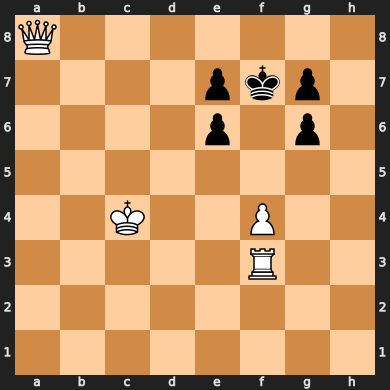

In [3]:
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1")  # black to move
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1")  # white to move
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")
# board = chess.Board("5k2/4ppp1/8/8/2K5/5R2/8/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1")

# board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
# board = chess.Board("Q7/4pkp1/3rp1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5P2/5R2/6q1 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1")




# board = chess.Board("Q7/4pkp1/4p1p1/8/2K5/5R2/8/8 w - - 0 1")
# board = chess.Board("2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1") # reddit

# board = chess.Board("5K2/8/8/P3pkp1/p6p/4P2P/1nN5/8 w - - 0 1")
# board = chess.Board("8/6q1/8/8/8/5k2/8/4K3 b - - 0 1")  # black to mate
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")  # white to mate
# board = chess.Board("3q1k2/8/8/8/8/8/2R5/2K5 w - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1")
# board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1")
# board = chess.Board()
print(board.turn)
board

In [4]:
engine = StockfishWrapper(predict_analyze_time=0.01, output_improvement_delta=True)

In [5]:
engine.fit([board])
engine.base_score_

100

In [6]:
chesshap = ChessShap(board, engine, exp=shap.KernelExplainer)
print(chesshap.engine.base_score_)

100


In [7]:
chesshap.shap_values(100)
# chesshap.shap_values(10)

  0%|          | 0/1 [00:00<?, ?it/s]

array([[ 80.94206122, -19.55548112, -12.911744  , -24.35195133,
        -18.91174514, -22.09594484, 116.88480521]])

True
False
False
100.0


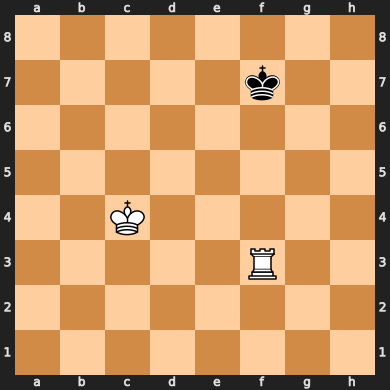

In [8]:
i = 0
print(chesshap.engine.base_board_.turn)
print(chesshap.engine.predict_boards_[i].is_valid())
print(chesshap.engine.predict_boards_[i].is_checkmate())
print(chesshap.engine.predict_evals_[i])
# print(chesshap.engine.multipliers_[i])
chesshap.engine.predict_boards_[i]


In [9]:
chesshap.shap_values_.sum() + chesshap.explainer_.expected_value - chesshap.engine.base_score_

np.float64(0.0)

In [10]:
chesshap.explainer_.expected_value

0.0

In [11]:
chesshap.engine.base_score_

100

In [12]:
chesshap.shap_values_.sum()

np.float64(100.0)

In [13]:
chesshap.shap_values_

array([[ 80.94206122, -19.55548112, -12.911744  , -24.35195133,
        -18.91174514, -22.09594484, 116.88480521]])

In [14]:
chesshap.explainer_.expected_value

0.0

In [31]:
chesshap.explainer_()

AssertionError: Unknown instance type: <class 'chess.Board'>

In [15]:
chesshap.shap_values_

array([[ 80.94206122, -19.55548112, -12.911744  , -24.35195133,
        -18.91174514, -22.09594484, 116.88480521]])

In [16]:
chesshap.pieces

{21: Piece.from_symbol('R'),
 29: Piece.from_symbol('P'),
 44: Piece.from_symbol('p'),
 46: Piece.from_symbol('p'),
 52: Piece.from_symbol('p'),
 54: Piece.from_symbol('p'),
 56: Piece.from_symbol('Q')}

In [28]:
import pandas as pd
df = pd.DataFrame([chesshap.pieces], index=["piece"]).T
df["value"] = chesshap.shap_values_.ravel()
df["piece"] = df["piece"].apply(lambda x: x.unicode_symbol())
df = df.reset_index()
df["square"] = df["index"].apply(lambda x: chess.square_name(x))
df = df[["square", "piece", "value"]]
df["feature_name"] = df["piece"] + " " + df["square"]
df

,square,piece,value,feature_name
0,f3,♖,80.942061,♖ f3
1,f4,♙,-19.555481,♙ f4
2,e6,♟,-12.911744,♟ e6
3,g6,♟,-24.351951,♟ g6
4,e7,♟,-18.911745,♟ e7
5,g7,♟,-22.095945,♟ g7
6,a8,♕,116.884805,♕ a8


In [29]:
shap.plots.waterfall(chesshap.shap_values_, max_display=14)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [20]:
chesshap.explainer_.expected_value, chesshap.engine.base_score_

(0.0, 100)

In [21]:
# chesshap.plot()

In [22]:
# chesshap.plot(absolute=False)

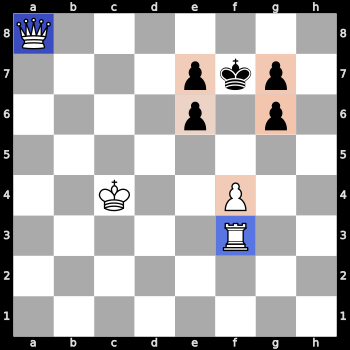

In [23]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

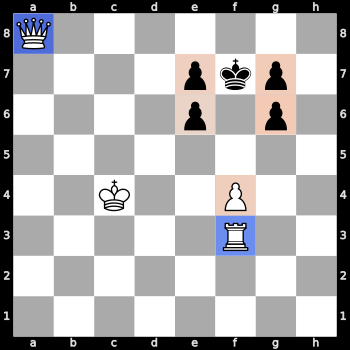

In [24]:
chesshap.to_svg(local_range=True, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

In [25]:
print(chesshap.to_latex())


    \definecolor{shapf3}{HTML}{1F62A7}
\definecolor{shapf4}{HTML}{FDDBC7}
\definecolor{shape6}{HTML}{FAE4D7}
\definecolor{shapg6}{HTML}{FACEB6}
\definecolor{shape7}{HTML}{FCDCC8}
\definecolor{shapg7}{HTML}{FBD4BE}
\definecolor{shapa8}{HTML}{053061}
    
    \newgame
    \chessboard[
      setfen=Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    


In [26]:
print(chesshap.to_latex(local_range=True))


    \definecolor{shapf3}{HTML}{337DB8}
\definecolor{shapf4}{HTML}{FCDFCE}
\definecolor{shape6}{HTML}{FAE7DB}
\definecolor{shapg6}{HTML}{FCD8C4}
\definecolor{shape7}{HTML}{FBE0D0}
\definecolor{shapg7}{HTML}{FCDCC8}
\definecolor{shapa8}{HTML}{053061}
    
    \newgame
    \chessboard[
      setfen=Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    
